<a href="https://colab.research.google.com/github/xbarto0c/MPC-MLF/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Generate a random sinewave and train a neural network to do regression of the sinewave.

In [5]:
import numpy as np
import matplotlib.pyplot as pt
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense

In [106]:
def generate_sine(cycles, resolution):
  length = np.pi * 2 * cycles;
  my_wave = np.sin(np.arange(0, length, length / resolution));
  time = np.linspace(0,length,resolution);
  # pt.figure();
  # pt.plot(time,my_wave);
  return(time,my_wave);

In [107]:
x_train, y_train = generate_sine(2, 20000);
x_train = pd.DataFrame(x_train, columns = ['time']);
y_train = pd.DataFrame(y_train, columns = ['f(x)']);

x_test, y_test = generate_sine(2, 128);
x_test = pd.DataFrame(x_test, columns = ['time']);
y_test = pd.DataFrame(y_test, columns = ['f(x)']);


In [108]:
model = Sequential();
model.add(Dense(units = 1, input_dim = 1, activation = 'tanh'));
model.add(Dense(units = 64, activation = 'relu'));
model.add(Dense(units = 64, activation = 'relu'));
model.add(Dense(units = 64, activation = 'relu'));
model.add(Dense(units = 64, activation = 'relu'));
# model.add(Dense(units = 64, activation = 'relu'));
model.add(Dense(1, activation = 'tanh'));
# Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(x_train, y_train ,batch_size = 100, epochs = 20, verbose=1, validation_split = 0.2);

Epoch 1/20
160/160 [==============================] - 2s 4ms/step - loss: 0.4470 - val_loss: 0.8973
Epoch 2/20
160/160 [==============================] - 1s 3ms/step - loss: 0.4445 - val_loss: 0.9066
Epoch 3/20
160/160 [==============================] - 0s 3ms/step - loss: 0.4440 - val_loss: 0.9074
Epoch 4/20
160/160 [==============================] - 0s 3ms/step - loss: 0.4433 - val_loss: 0.7626
Epoch 5/20
160/160 [==============================] - 1s 3ms/step - loss: 0.4137 - val_loss: 0.5588
Epoch 6/20
160/160 [==============================] - 0s 3ms/step - loss: 0.3265 - val_loss: 0.5344
Epoch 7/20
160/160 [==============================] - 0s 3ms/step - loss: 0.3218 - val_loss: 0.5714
Epoch 8/20
160/160 [==============================] - 0s 3ms/step - loss: 0.3201 - val_loss: 0.5623
Epoch 9/20
160/160 [==============================] - 0s 3ms/step - loss: 0.3191 - val_loss: 0.5266
Epoch 10/20
160/160 [==============================] - 0s 3ms/step - loss: 0.2838 - val_loss: 1.5982

4/4 [==============================] - 0s 3ms/step


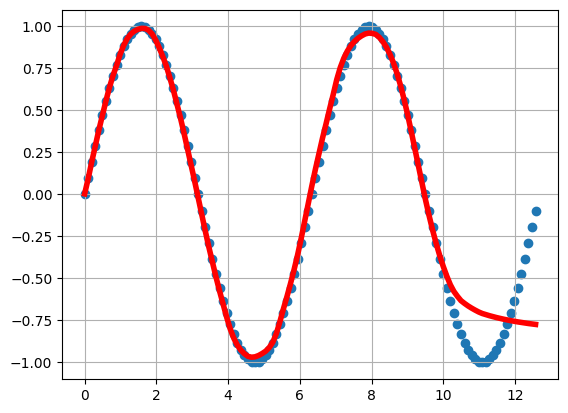

In [109]:
y_predicted = model.predict(x_test);
pt.scatter(x_test[::1], y_test[::1])
pt.plot(x_test, y_predicted, 'r', linewidth=4)
pt.grid()
pt.show()

Convolutional Nerual Network (CNN)

11490434/11490434 [==============================] - 0s 0us/step


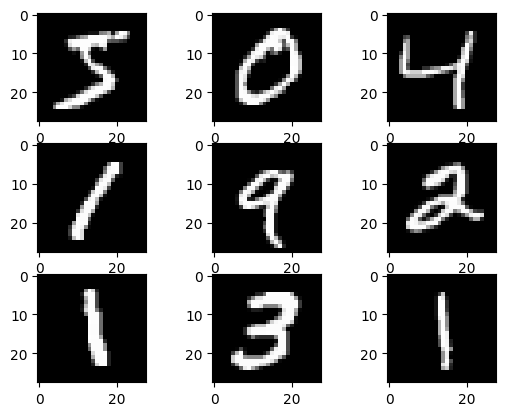

In [9]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data();

for i in range(9):
 # define subplot
 pt.subplot(330 + 1 + i);
 # plot raw pixel data
 pt.imshow(x_train[i], cmap=pt.get_cmap('gray'));
# show the figure
pt.show();

In [10]:
from tensorflow.keras.utils import to_categorical
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))
y_train = to_categorical(y_train);
y_test = to_categorical(y_test);

# convert from integers to floats
x_train = x_train.astype('float32');
x_test = x_test.astype('float32');
# normalize to range 0-1
x_train = x_train / 255.0;
x_test = x_test / 255.0;


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD

model = Sequential();
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)));
model.add(MaxPooling2D((2, 2)));
model.add(Flatten());
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'));
model.add(Dense(10, activation='softmax'));
# compile model
opt = SGD(learning_rate=0.01, momentum=0.9);
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy']);

history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test), verbose=1);

Epoch 1/10
1875/1875 [==============================] - 18s 4ms/step - loss: 0.1673 - accuracy: 0.9482 - val_loss: 0.0635 - val_accuracy: 0.9791
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0561 - accuracy: 0.9835 - val_loss: 0.0461 - val_accuracy: 0.9860
Epoch 3/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0366 - accuracy: 0.9889 - val_loss: 0.0530 - val_accuracy: 0.9818
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0252 - accuracy: 0.9925 - val_loss: 0.0422 - val_accuracy: 0.9863
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0170 - accuracy: 0.9951 - val_loss: 0.0401 - val_accuracy: 0.9876
Epoch 6/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0117 - accuracy: 0.9969 - val_loss: 0.0383 - val_accuracy: 0.9868
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0084 - accuracy: 0.9979 - val_loss: 0.0364 - val_accuracy

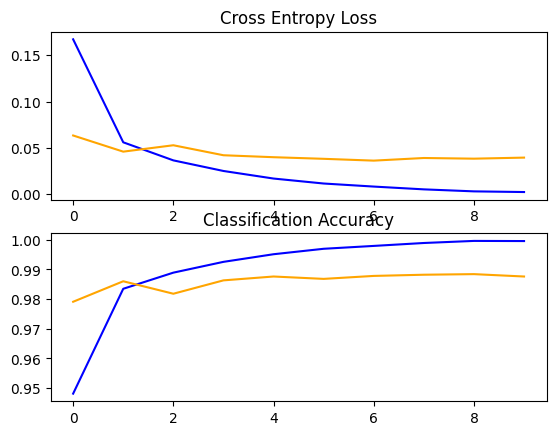

In [13]:
pt.subplot(2, 1, 1)
pt.title('Cross Entropy Loss')
pt.plot(history.history['loss'], color='blue', label='train')
pt.plot(history.history['val_loss'], color='orange', label='test')
# plot accuracy
pt.subplot(2, 1, 2)
pt.title('Classification Accuracy')
pt.plot(history.history['accuracy'], color='blue', label='train')
pt.plot(history.history['val_accuracy'], color='orange', label='test')
pt.show()